# k-Means
![](banner_kmeans.jpg)
_<p style="text-align: center;"> Where is the gravitational center? </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
                                
update_geom_defaults("point", list(size=6, colour="grey40"))
update_geom_defaults("text", list(hjust=0.4, vjust=0.4, colour="white"))

== document setup ==

## Introduction

Motivation, context, history, related topics ...

## Synopsis

**Terms**

* Centroid
* Dissimilarity measure

## Exposition

### Data

In [2]:
data = data.frame(x1=c(2, 2, 3, 5, 10, 12), x2=c(1, 4, 4, 4, 4, 4))
data %>% caption

x1,x2
2,1
2,4
3,4
5,4
10,4
12,4


### Initialize

Randomly locate cluster centroids.

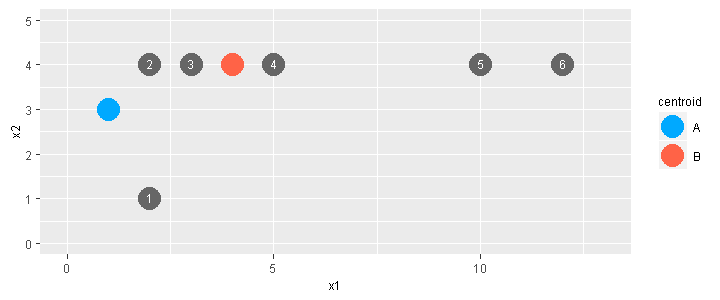

In [3]:
centroid = data.frame(x1=c(1,4), x2=c(3,4))
row.names(centroid) = c("A","B")

output_size(6,2.5)
ggplot() + xlim(0,13) + ylim(0, 5) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [4]:
row.arrange(data %>% captionx(row.names=TRUE), centroid %>% captionx(row.names=TRUE))

,x1,x2
1,2,1
2,2,4
3,3,4
4,5,4
5,10,4
6,12,4
,x1,x2
A,1,3
B,4,4


### Re-Locate Centroids

**Step 1**

Calculate distances from the observations to the centroids.  Assign each observation to the cluster associated with its nearest centroid.

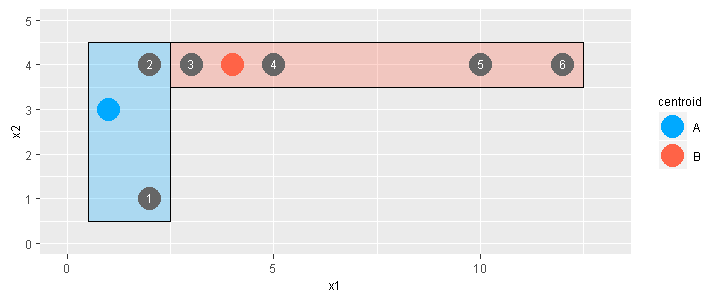

In [5]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=0.5, xmax=2.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=2.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [6]:
data$cluster = c("A","A","B","B","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
row.arrange(data %>% captionx(row.names=TRUE),
            centroid %>% captionx(row.names=TRUE),
            distance %>% captionx("distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 cluster 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 B 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 1 
 3 
 
 
 B 
 4 
 4 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 2.236068 
 3.605551 
 
 
 2 
 1.414214 
 2.000000 
 
 
 3 
 2.236068 
 1.000000 
 
 
 4 
 4.123106 
 1.000000 
 
 
 5 
 9.055385 
 6.000000 
 
 
 6 
 11.045361 
 8.000000

Calculate a new centroid for each cluster of observations. 

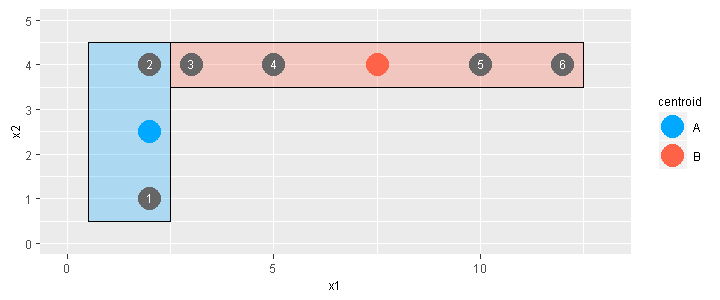

In [7]:
centroid$x1 = c(mean(data$x1[data$cluster=="A"]), mean(data$x1[data$cluster=="B"]))
centroid$x2 = c(mean(data$x2[data$cluster=="A"]), mean(data$x2[data$cluster=="B"]))

output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=0.5, xmax=2.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=2.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [8]:
distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
row.arrange(data %>% captionx(row.names=TRUE),
            centroid %>% captionx(row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 cluster 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 B 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.0 
 2.5 
 
 
 B 
 7.5 
 4.0

**Step 2**

Calculate distances from the observations to the centroids.  Assign each observation to the cluster associated with its nearest centroid.

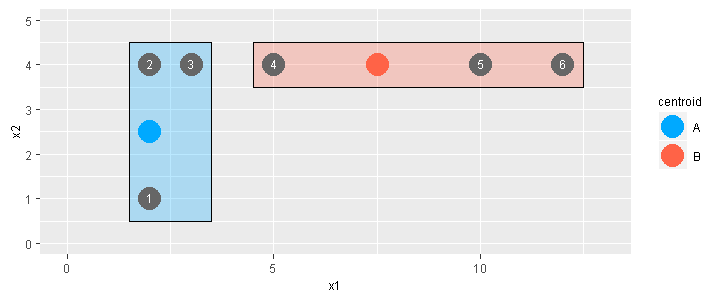

In [9]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=3.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=4.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [10]:
data$cluster = c("A","A","A","B","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
row.arrange(data %>% captionx(row.names=TRUE),
            centroid %>% captionx(row.names=TRUE),
            distance %>% captionx("distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 cluster 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.0 
 2.5 
 
 
 B 
 7.5 
 4.0 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 1.500000 
 6.264982 
 
 
 2 
 1.500000 
 5.500000 
 
 
 3 
 1.802776 
 4.500000 
 
 
 4 
 3.354102 
 2.500000 
 
 
 5 
 8.139410 
 2.500000 
 
 
 6 
 10.111874 
 4.500000

Calculate a new centroid for each cluster of observations. 

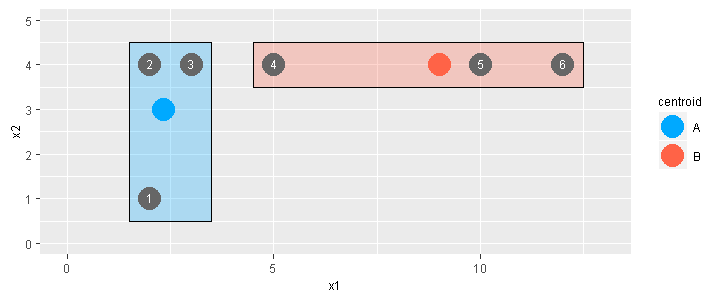

In [11]:
centroid$x1 = c(mean(data$x1[data$cluster=="A"]), mean(data$x1[data$cluster=="B"]))
centroid$x2 = c(mean(data$x2[data$cluster=="A"]), mean(data$x2[data$cluster=="B"]))

output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=3.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=4.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [12]:
distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
row.arrange(data %>% captionx(row.names=TRUE),
            centroid %>% captionx(row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 cluster 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 B 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.333333 
 3 
 
 
 B 
 9.000000 
 4

**Step 3**

Calculate distances from the observations to the centroids.  Assign each observation to the cluster associated with its nearest centroid.

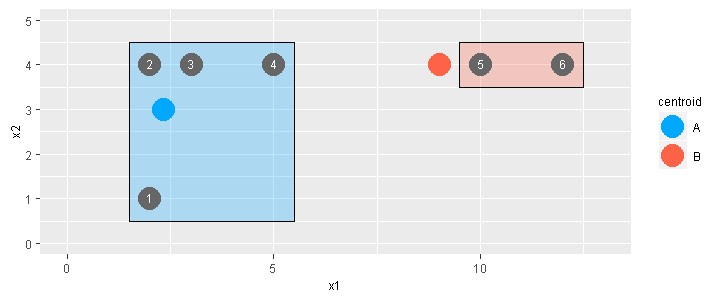

In [13]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=5.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=9.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [14]:
data$cluster = c("A","A","A","A","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
row.arrange(data %>% captionx(row.names=TRUE),
            centroid %>% captionx(row.names=TRUE),
            distance %>% captionx("distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 cluster 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 A 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 2.333333 
 3 
 
 
 B 
 9.000000 
 4 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 2.027588 
 7.615773 
 
 
 2 
 1.054093 
 7.000000 
 
 
 3 
 1.201850 
 6.000000 
 
 
 4 
 2.848001 
 4.000000 
 
 
 5 
 7.731609 
 1.000000 
 
 
 6 
 9.718253 
 3.000000

Calculate a new centroid for each cluster of observations. 

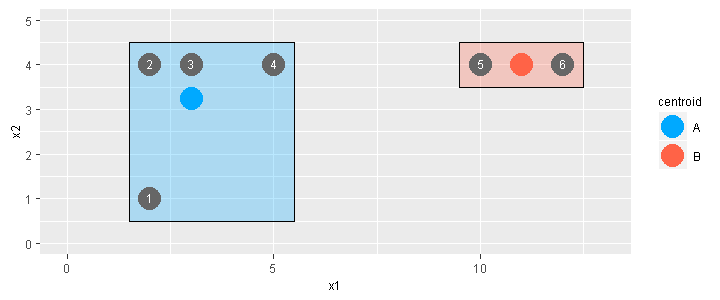

In [15]:
centroid$x1 = c(mean(data$x1[data$cluster=="A"]), mean(data$x1[data$cluster=="B"]))
centroid$x2 = c(mean(data$x2[data$cluster=="A"]), mean(data$x2[data$cluster=="B"]))

output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=5.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=9.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [16]:
distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
row.arrange(data %>% captionx(row.names=TRUE), centroid %>% captionx(row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 cluster 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 A 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 3 
 3.25 
 
 
 B 
 11 
 4.00

**Step 4**

Calculate distances from the observations to the centroids.  Assign each observation to the cluster associated with its nearest centroid.  Note that there is no change is cluster assignments.

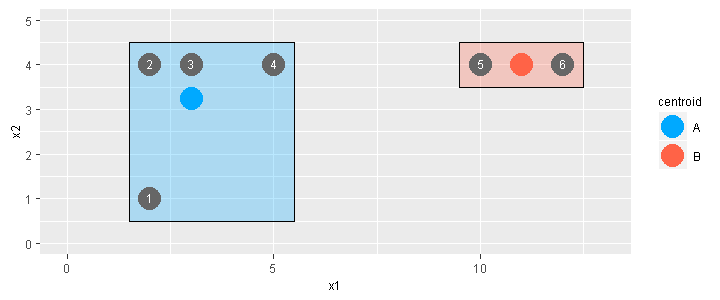

In [17]:
output_size(6,2.5)
ggplot(data) + xlim(0,13) + ylim(0, 5) +
geom_rect(xmin=1.5, xmax=5.5, ymin=0.5, ymax=4.5, color="black", fill=PALETTE[1], alpha=0.05) +
geom_rect(xmin=9.5, xmax=12.5, ymin=3.5, ymax=4.5, color="black", fill=PALETTE[2], alpha=0.05) +
geom_point(aes(x=x1, y=x2), data=data) +
geom_text(aes(x=x1, y=x2, label=seq(1,6)), data=data) +
geom_point(aes(x=x1, y=x2, color=row.names(centroid)), data=centroid) +
labs(color="centroid") + theme.legend_title

In [18]:
data$cluster = c("A","A","A","A","B","B")

distance = data.frame(A=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[1,], data[i,1:2]), "euclidean"))),
                      B=aaply(1:nrow(data), 1, function(i) as.numeric(dist(rbind(centroid[2,], data[i,1:2]), "euclidean"))))
          
row.arrange(data %>% captionx(row.names=TRUE),
            centroid %>% captionx(row.names=TRUE),
            distance %>% captionx("distance to centroid", row.names=TRUE))

data 
 
 
 
 x1 
 x2 
 cluster 
 
 
 
 
 1 
 2 
 1 
 A 
 
 
 2 
 2 
 4 
 A 
 
 
 3 
 3 
 4 
 A 
 
 
 4 
 5 
 4 
 A 
 
 
 5 
 10 
 4 
 B 
 
 
 6 
 12 
 4 
 B 
 
 
 
 centroid 
 
 
 
 x1 
 x2 
 
 
 
 
 A 
 3 
 3.25 
 
 
 B 
 11 
 4.00 
 
 
 
 distance to centroid 
 
 
 
 A 
 B 
 
 
 
 
 1 
 2.462214 
 9.486833 
 
 
 2 
 1.250000 
 9.000000 
 
 
 3 
 0.750000 
 8.000000 
 
 
 4 
 2.136001 
 6.000000 
 
 
 5 
 7.040064 
 1.000000 
 
 
 6 
 9.031196 
 1.000000

### Commit Cluster Assignments

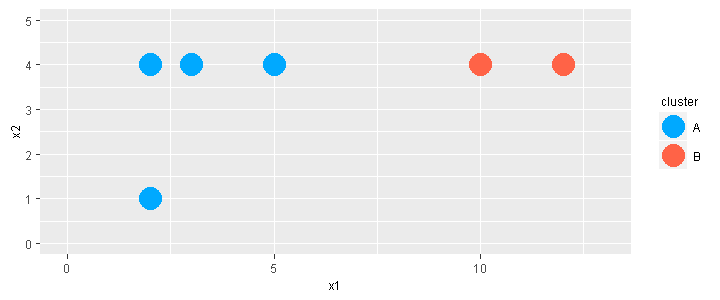

In [19]:
output_size(6,2.5)
ggplot() + xlim(0,13) + ylim(0, 5) +
geom_point(aes(x=x1, y=x2, color=cluster), data=data) +
theme.legend_title

In [20]:
data %>% caption

x1,x2,cluster
2,1,A
2,4,A
3,4,A
5,4,A
10,4,B
12,4,B


## Code

### Useful Functions

### Templates

## Expectations

Know about this:



## Further Reading

* http://shabal.in/visuals/kmeans/3.html

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised October 23, 2019
</span>
</p>